# <strong><i>Lead Scoring Case Study</strong>

## Business Objective:
- X Education, an online education company, aims to significantly improve its lead conversion rate from the current 30% to a targeted 80% by focusing its sales efforts on "Hot Leads"—those most likely to convert into paying customers. By identifying and prioritizing these high-potential leads, the company seeks to optimize its resource allocation, improve overall efficiency, and drive higher revenue.

## Flow of code:
1. Loading and Understanding the Dataset
2. Data Cleaning
    - Handling Missing values
    - Handling Skewness of data
    - Treating Outliers
3. Data Visualization
4. Data Preprocessing for Modeling
   - Creating Dummies
   - Train Test Split
   - Feature Scaling     
5. Model Building
6. Model Evaluation
7. Conclusion


# Step-1. Loading and Understanding the Dataset

In [4]:
# Importing the necessary libraries
import numpy as np , pandas as pd
pd.set_option('display.max_columns', None)

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Model Building
import statsmodels.api as sm

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from statsmodels.stats.outliers_influence import variance_inflation_factor

# for Model evaluation
from sklearn import metrics
from sklearn.metrics import precision_recall_curve

In [5]:
# Loading the Dataset
df_leads = pd.read_csv('Leads.csv')
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
# shape of the dataset
df_leads.shape

(9240, 37)

In [7]:
# Checking the information of the dataset
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
# Checking descriptive statistics of dataset
df_leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Step-2. Data Cleaning

## Handling Missing Values

In [11]:
# Checking the missing values in the dataset
df_leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

>### Observation:
>> - There are sevaral columns with missing values so we need to Clean the dataset

- <b>As mentioned in the Problem Statement, many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value.
- <b>One of the reason might be is that the customer did not select any option from the list and hence for such columns the data remained as default 'Select' for Select.



In [14]:
# list of columns with 'Select' values
colsWithSelect = [col for col in df_leads.columns if df_leads[col].isin(['Select']).sum() > 0 ]
colsWithSelect

['Specialization',
 'How did you hear about X Education',
 'Lead Profile',
 'City']

In [15]:
# Converting 'Select' as Null values
df_leads[colsWithSelect] = np.where(df_leads[colsWithSelect] == 'Select' , np.nan, df_leads[colsWithSelect])

In [16]:
# Checking for missing percentage
percentNullValues = df_leads.isna().mean()*100
percentNullValues.sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [17]:
# we will Drop the columns having missing value greater than 35%
delete_cols = [col for col in df_leads.columns if percentNullValues[col] > 35]
delete_cols

['Specialization',
 'How did you hear about X Education',
 'Tags',
 'Lead Quality',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [18]:
# Dropping the columns having missing value > 35%
print('Shape Before Dropping : ',df_leads.shape)
df_leads = df_leads.drop(delete_cols , axis=1)
print('Shape After Dropping : ',df_leads.shape)

Shape Before Dropping :  (9240, 37)
Shape After Dropping :  (9240, 27)


In [19]:
# Checking the Null values
percentNullValues = df_leads.isna().mean()*100
percentNullValues.sort_values(ascending=False)

What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
X Education Forums                                0.000000
A free copy of Mastering The Interview            0.000000
I agree to pay the amount through cheque          0.000000
Get updates on DM Content                         0.000000
Update me on Supply Chain Content                 0.000000
Receive More Updates About Our Courses            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.000000
Prospect ID                                       0.0000

In [20]:
# Selecting columns with categorical data
cat_cols = [col for col in df_leads.columns if df_leads[col].dtype == 'object' and col != 'Prospect ID']
cat_cols

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [21]:
# Checking the number of unique values in each categorical column
df_leads[cat_cols].nunique().sort_values()

I agree to pay the amount through cheque          1
Get updates on DM Content                         1
Update me on Supply Chain Content                 1
Receive More Updates About Our Courses            1
Magazine                                          1
Newspaper Article                                 2
Do Not Email                                      2
Do Not Call                                       2
Search                                            2
A free copy of Mastering The Interview            2
X Education Forums                                2
Newspaper                                         2
Digital Advertisement                             2
Through Recommendations                           2
What matters most to you in choosing a course     3
Lead Origin                                       5
What is your current occupation                   6
Last Notable Activity                            16
Last Activity                                    17
Lead Source 

>### Observation:
>> - There are several categorical columns with a single unique value,that does not add much value to our analysis so it is advisable to drop them

In [23]:
# Selecting the columns with single unique value
delete_cols = [col for col in cat_cols if df_leads[col].nunique() == 1]
delete_cols

['Magazine',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [24]:
# Dropping the columns with single unique value
print('Shape Before Dropping : ',df_leads.shape)
df_leads = df_leads.drop(delete_cols,axis=1)
print('Shape After Dropping : ',df_leads.shape)

Shape Before Dropping :  (9240, 27)
Shape After Dropping :  (9240, 22)


In [25]:
# Updating categorical columns
new_cat_cols = [col for col in cat_cols if col not in delete_cols]
cat_cols = new_cat_cols
cat_cols

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [26]:
# Checking for missing percentage
percentNullValues = df_leads.isna().mean()*100
percentNullValues.sort_values(ascending=False)

What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Search                                            0.000000
A free copy of Mastering The Interview            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.000000
X Education Forums                                0.000000
Newspaper Article                                 0.000000
Prospect ID                                       0.000000
Lead Number                                       0.000000
Total Time Spent on Website                       0.0000

In [27]:
# Checking the frequency of a categorical columns with Null Values
catColsWithNull = [col for col in percentNullValues.index if (col in cat_cols) and (percentNullValues[col] > 0)]

for col in catColsWithNull:
    print('Frequency of column : ',col)
    print()
    print((df_leads[col].value_counts(normalize=True)*100).sort_values(ascending=False))
    print('*'*40,'\n')

Frequency of column :  Lead Source

Lead Source
Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Press_Release         0.021730
Social Media          0.021730
Live Chat             0.021730
youtubechannel        0.010865
testone               0.010865
Pay per Click Ads     0.010865
welearnblog_Home      0.010865
WeLearn               0.010865
blog                  0.010865
NC_EDM                0.010865
Name: proportion, dtype: float64
**************************************** 

Frequency of column :  Last Activity

Last Activity
Email Opened                    37.616285
SMS Sent                        30.042684
Olark Chat Conversation         10.649010
Page Visited on Website          7.004487
Conve

>### Observation:
>>- **Lead Source:** We can impute missing values using the mode('Google') as this column has only 0.38% missing values. For categories with very few entries, we can group them into an 'Other' category. We also need to fix the category 'Google,' which appears as both 'google' and 'Google'.

>>- **Last Activity:** We can impute missing values using the mode('Email Opened') as this column has 1.11% missing values. For categories with very few entries, we can group them into an 'Other' category.

>>- **Country:** Since approximately 96% of X Education's customers are from India, it does not currently make business sense to impute missing values to India. Therefore, it is recommended that the Country column be dropped from the dataset.

>>- **What is your current occupation:** We will impute the missing values as 'Missing' as this column has 29.1% missing values by dropping them we will loose too much of data. and This is crucial from a business perspective, as many 'Unemployed' individuals actively seek online courses to improve their employment prospects.

>>- **What matters most to you in choosing a course:** Since 99.9% of people are enrolling for courses for better career prospects it is advisable to drop this column

In [29]:
# Dropping the columns as per above observations
print('Shape Before Dropping : ',df_leads.shape)
df_leads = df_leads.drop(['Country' , 'What matters most to you in choosing a course'],axis=1)
print('Shape After Dropping : ',df_leads.shape)

Shape Before Dropping :  (9240, 22)
Shape After Dropping :  (9240, 20)


In [30]:
# Manipulating Lead Source Column as per above observations

# Replacing 'google' with 'Google'
df_leads['Lead Source'] = df_leads['Lead Source'].replace('google','Google')

# Imputing Missing values with Mode
df_leads['Lead Source'].fillna(df_leads['Lead Source'].mode()[0] , inplace=True)

In [31]:
# Checking the 'Lead Source' column
lead_source = df_leads['Lead Source'].value_counts()
lead_source

Lead Source
Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: count, dtype: int64

In [32]:
# Grouping the Categories with few entries as 'Others'
others = list(lead_source[lead_source < 50].index)
df_leads['Lead Source'] = df_leads['Lead Source'].replace(others , 'Others')

# confirming the change
df_leads['Lead Source'].value_counts()

Lead Source
Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Others                23
Name: count, dtype: int64

In [33]:
# Imputing the missing values of the 'Last Activity' column
df_leads['Last Activity'].fillna(df_leads['Last Activity'].mode()[0],inplace=True)

In [34]:
# Checking the 'Last Activity' column
last_act = df_leads['Last Activity'].value_counts()
last_act

Last Activity
Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [35]:
# Grouping the Categories with few entries as 'Others'
others = list(last_act[last_act < 100].index)
df_leads['Last Activity'] = df_leads['Last Activity'].replace(others , 'Others')

# confirming the change
df_leads['Last Activity'].value_counts()

Last Activity
Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Others                        205
Form Submitted on Website     116
Name: count, dtype: int64

In [36]:
# Imputing missing values of 'What is your current occupation' column as 'Missing'
df_leads['What is your current occupation'].fillna('Missing',inplace=True)

In [37]:
# Checking for missing percentage
percentNullValues = df_leads.isna().mean()*100
percentNullValues.sort_values(ascending=False)

TotalVisits                               1.482684
Page Views Per Visit                      1.482684
Prospect ID                               0.000000
What is your current occupation           0.000000
A free copy of Mastering The Interview    0.000000
Through Recommendations                   0.000000
Digital Advertisement                     0.000000
Newspaper                                 0.000000
X Education Forums                        0.000000
Newspaper Article                         0.000000
Search                                    0.000000
Last Activity                             0.000000
Lead Number                               0.000000
Total Time Spent on Website               0.000000
Converted                                 0.000000
Do Not Call                               0.000000
Do Not Email                              0.000000
Lead Source                               0.000000
Lead Origin                               0.000000
Last Notable Activity          

In [38]:
# Checking TotalVisits and Page Views Per Visit
print(df_leads['TotalVisits'].value_counts(normalize=True).head())
print('-'*40)
print(df_leads['Page Views Per Visit'].value_counts(normalize=True).head())

TotalVisits
0.0    0.240470
2.0    0.184555
3.0    0.143469
4.0    0.123036
5.0    0.086016
Name: proportion, dtype: float64
----------------------------------------
Page Views Per Visit
0.0    0.240470
2.0    0.197188
3.0    0.131385
4.0    0.098429
1.0    0.071515
Name: proportion, dtype: float64


>#### Observation:
>>- we can impute missing values of both the numerical column with 0

In [40]:
# Imputing missing values with 0.0
df_leads['TotalVisits'].fillna(0.0 , inplace=True)
df_leads['Page Views Per Visit'].fillna(0.0 , inplace=True)

In [41]:
# Checking for Null values
df_leads.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Do Not Call                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
What is your current occupation           0
Search                                    0
Newspaper Article                         0
X Education Forums                        0
Newspaper                                 0
Digital Advertisement                     0
Through Recommendations                   0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

>### Observation:
>>- Data has no missing values

#### Columns 'Prospect ID' and 'Lead Number' are no use for our analysis so its better to drop them

In [44]:
# Dropping the unnecessary columns
print('Shape Before Dropping : ',df_leads.shape)
df_leads = df_leads.drop(['Prospect ID','Lead Number'],axis=1)
print('Shape After Dropping : ',df_leads.shape)

Shape Before Dropping :  (9240, 20)
Shape After Dropping :  (9240, 18)


## Handling Skewness of Data

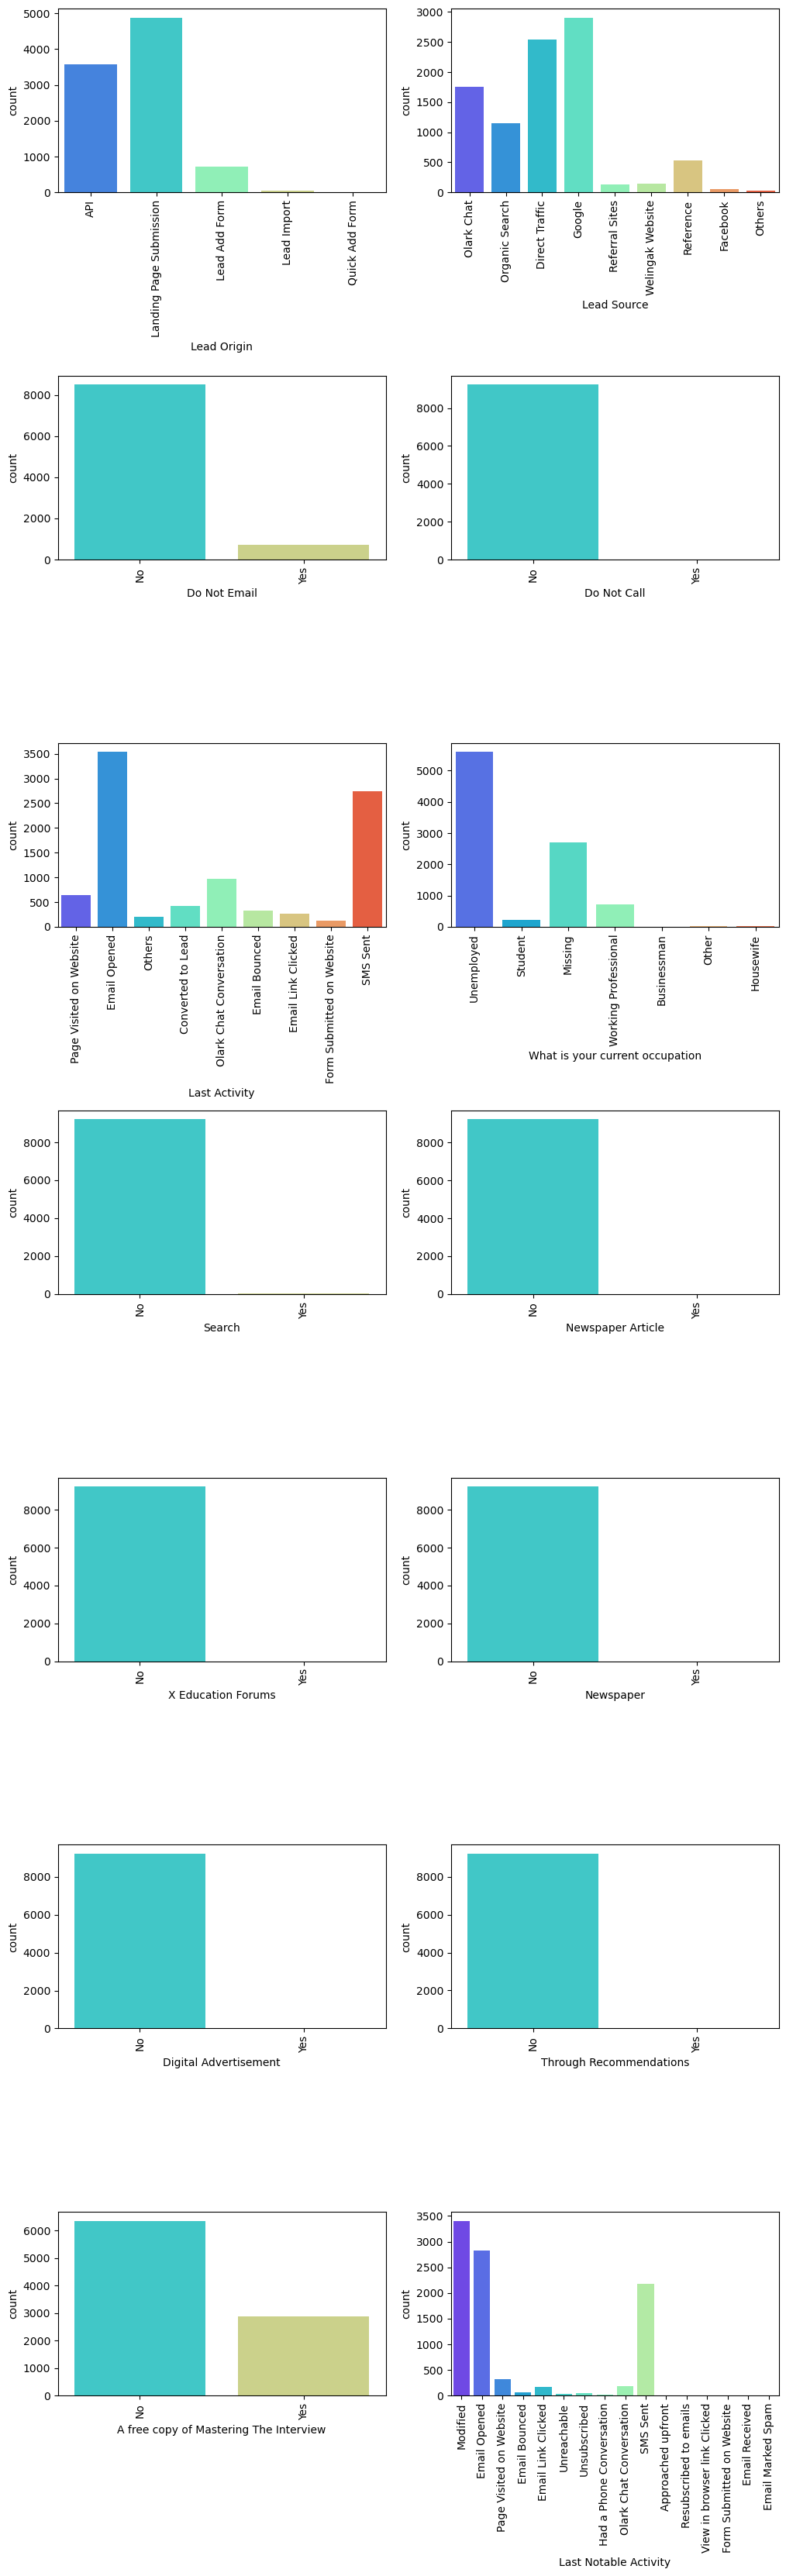

In [46]:
# plotting the value counts
cat_cols = df_leads.select_dtypes(include=['category', 'object']).columns.tolist()
plt.figure(figsize=(12,40))
plt.subplots_adjust(wspace=.2,hspace=1)
for i,col in enumerate(cat_cols):
    plt.subplot(7,2,i+1)
    sns.countplot(x=col , data=df_leads , palette='rainbow')
    plt.xticks(rotation=90)
plt.show()

>### Observation:
>>- **Columns with skewed data :**   'Do Not Call' , 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper' , 'Digital Advertisement' , 'Through Recommendations'
>>- Its recommended to drop these columns

In [48]:
# Dropping the skewed columns
print('Shape Before Dropping : ',df_leads.shape)
df_leads = df_leads.drop(['Do Not Call' , 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper' , 'Digital Advertisement' , 'Through Recommendations'],axis=1)
print('Shape After Dropping : ',df_leads.shape)

Shape Before Dropping :  (9240, 18)
Shape After Dropping :  (9240, 11)


## Treating Outliers

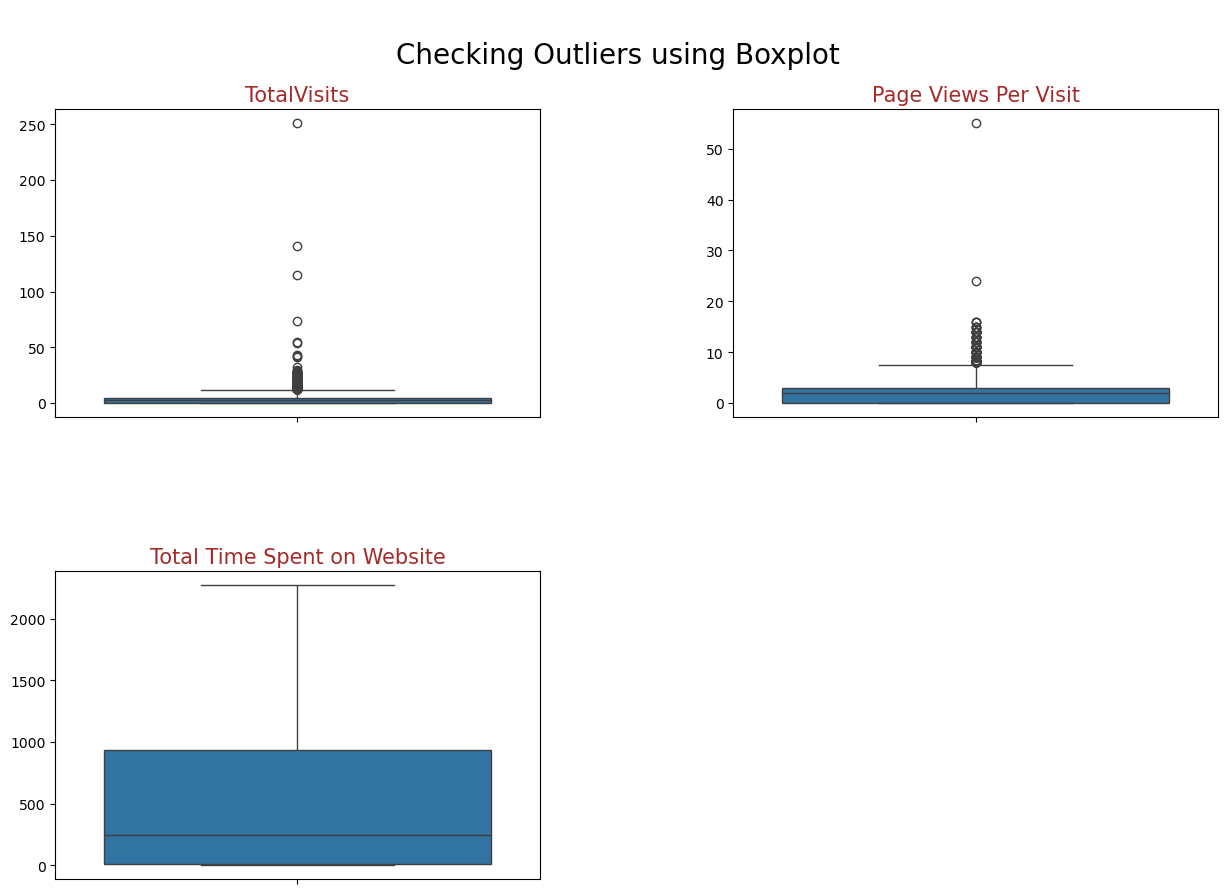

In [50]:
# Checking outliers for numerical variables other than target variable 
num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]

plt.figure(figsize=[15,10])
plt.subplots_adjust(wspace=0.4,hspace=0.5)
for i,col in enumerate(num_cols):
    plt.subplot(2,2,i+1)
    sns.boxplot(y=df_leads[col])     
    plt.suptitle("\nChecking Outliers using Boxplot",fontsize=20)
    plt.ylabel(None)
    plt.title(col,fontsize=15,color='brown')

In [51]:
# There are two features having outliers so we need to cap them

df_leads[num_cols].describe(percentiles = [.10, .25, .50, .75, .90, .95, .99])

,TotalVisits,Page Views Per Visit,Total Time Spent on Website
count,9240.000000,9240.000000,9240.000000
mean,3.394156,2.327787,487.698268
std,4.836682,2.164258,548.021466
min,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000
50%,3.000000,2.000000,248.000000
75%,5.000000,3.000000,936.000000
90%,7.000000,5.000000,1380.000000
95%,10.000000,6.000000,1562.000000


In [52]:
# Defining function for capping
def outlier_treatment(lst):
    for i,col in enumerate(lst):
        upper_bound = df_leads[col].quantile(0.95)
        df_leads[col] = np.where(df_leads[col] > upper_bound , upper_bound , df_leads[col])

In [53]:
# Treating the outliers
col_with_outlier = ['TotalVisits' , 'Page Views Per Visit']
outlier_treatment(col_with_outlier)

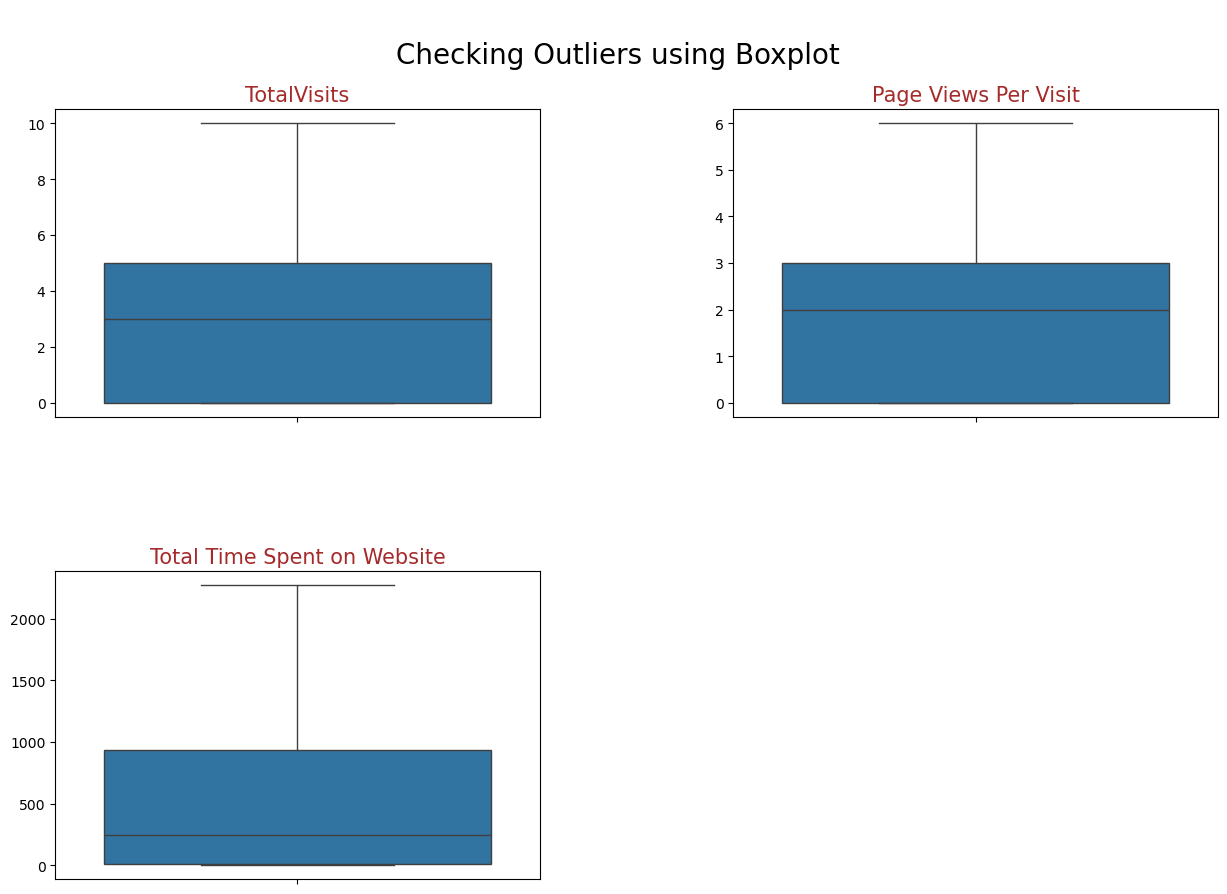

In [54]:
# Checking outliers for numerical variables other than target variable 
num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]

plt.figure(figsize=[15,10])
plt.subplots_adjust(wspace=0.4,hspace=0.5)
for i,col in enumerate(num_cols):
    plt.subplot(2,2,i+1)
    sns.boxplot(y=df_leads[col])     
    plt.suptitle("\nChecking Outliers using Boxplot",fontsize=20)
    plt.ylabel(None)
    plt.title(col,fontsize=15,color='brown')

>### Observations:
>>- All the outliers has been treated.
>>- Data is Cleaned

# Step-3. Data Visualization

In [57]:
# checking info
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   What is your current occupation         9240 non-null   object 
 9   A free copy of Mastering The Interview  9240 non-null   object 
 10  Last Notable Activity                   9240 non-null   obje

## Checking if Data is Imbalanced or not

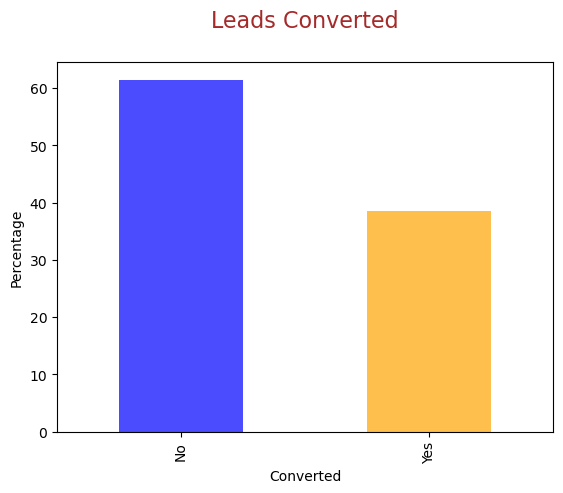

In [59]:
# Checking target variable 'Converted'
(df_leads.Converted.value_counts(normalize=True)*100).plot.bar(color=['blue','orange'],alpha=0.7)
plt.title("Leads Converted\n", fontdict={'fontsize': 16, 'fontweight' : 12, 'color' : 'brown'})
plt.xticks([0,1],["No","Yes"])
plt.ylabel('Percentage')
plt.show()

In [60]:
# Calculating Conversion rate
(sum(df_leads.Converted) / df_leads.shape[0])*100

38.53896103896104

>### Observation:
>>- **38.53%** is conversion rate. which means 38.53% people are converted to leads
>>- While majority of **61.47%** people are not converted

In [62]:
# Imbalance Ratio
print('Imbalance ratio is : ',round(62.15/37.85 , 3))

Imbalance ratio is :  1.642


In [63]:
cat_cols = [col for col in df_leads.columns if df_leads[col].dtype == 'object']
cat_cols

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Last Activity',
 'What is your current occupation',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [64]:
num_cols = ['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

## Segmented Univariate Analysis

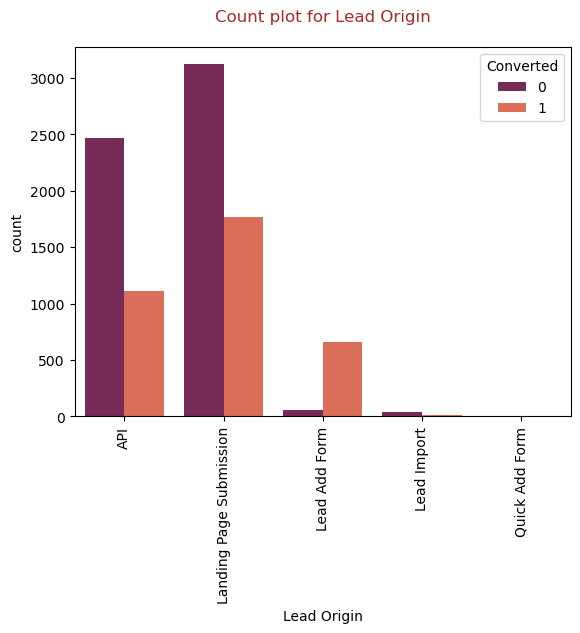

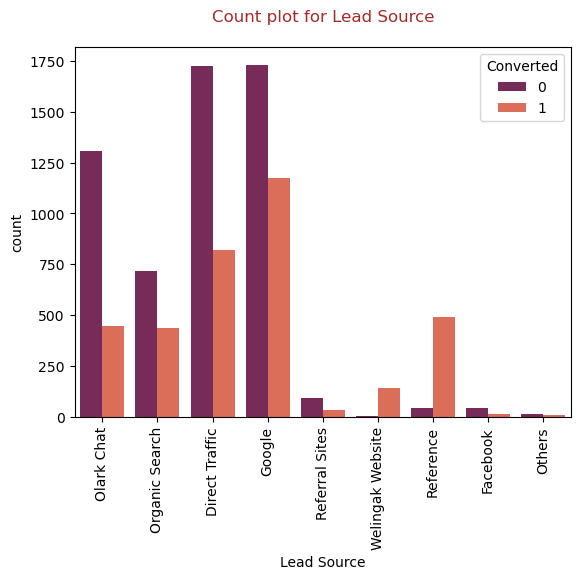

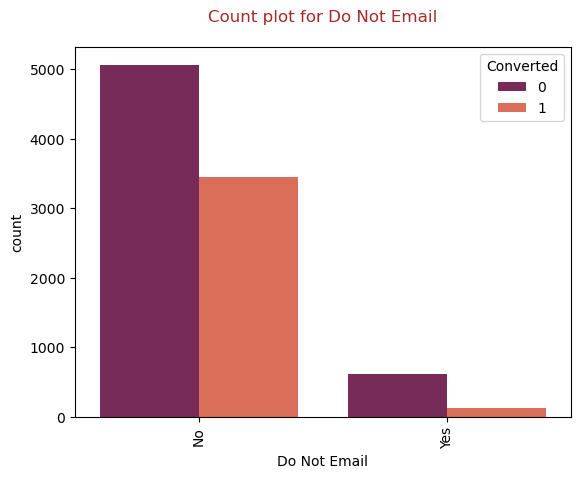

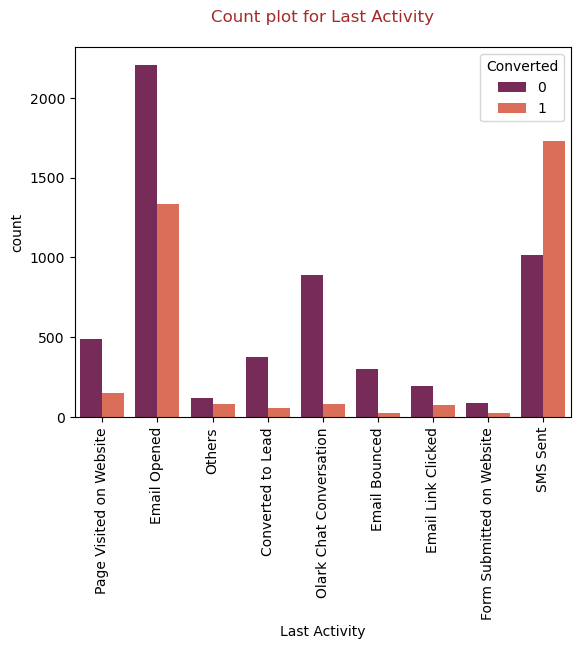

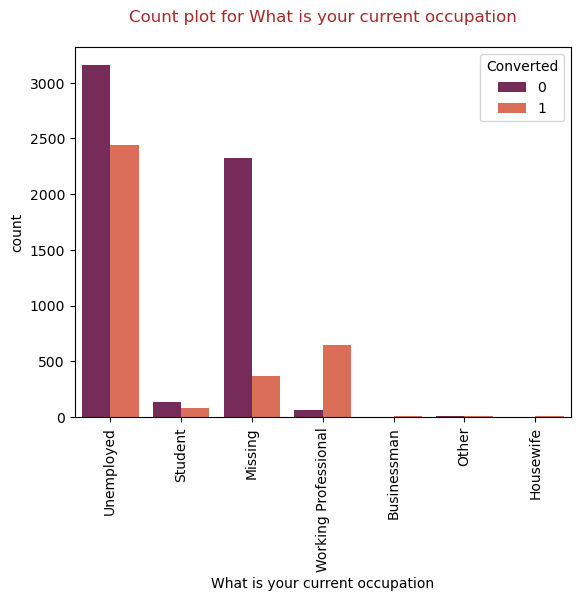

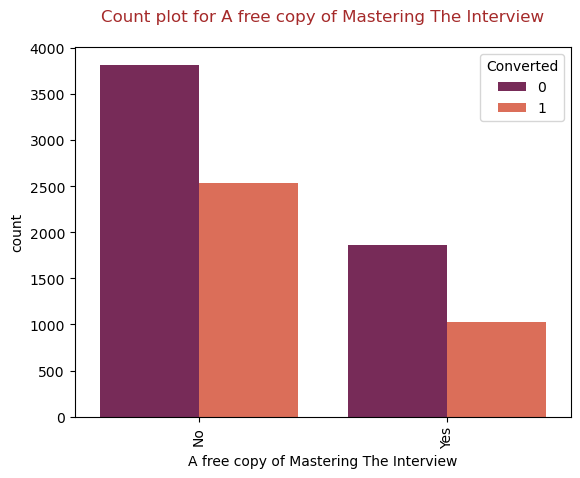

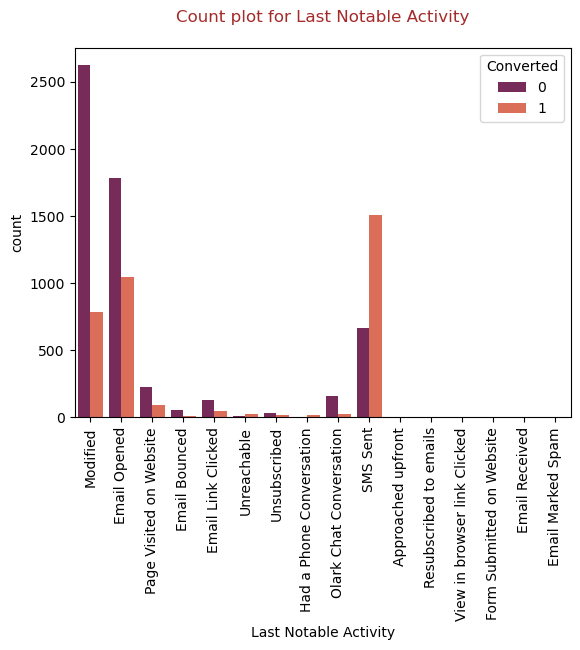

In [66]:
# For Categorical columns
for i,col in enumerate(cat_cols):
    plt.figure(i)
    sns.countplot(x=col , data=df_leads , hue= 'Converted' , palette='rocket')
    plt.title(('Count plot for '+col+'\n') , fontdict = {'color' : 'brown'})
    plt.xticks(rotation=90)

plt.show()

>### Observation:
>>- **Lead Origin :** Chances of getting converted are higher for customers who has origin from 'Lead Add Form' and origin for Majority of people are 'Landing Page Submission' and 'API'
>>- **Lead Source :** Majority of lead source are 'Google' and 'Direct Traffic'. Chances of getting converted are higher for 'Reference'
>>- **Last Activity :** Majority of people are with last activity as 'Email opened' but chances of getting converted are higher for people with last activity as 'SMS sent'
>>- **Current occupation :** Majority of people are Unemployed but chances of getting converted for working professionals are higher

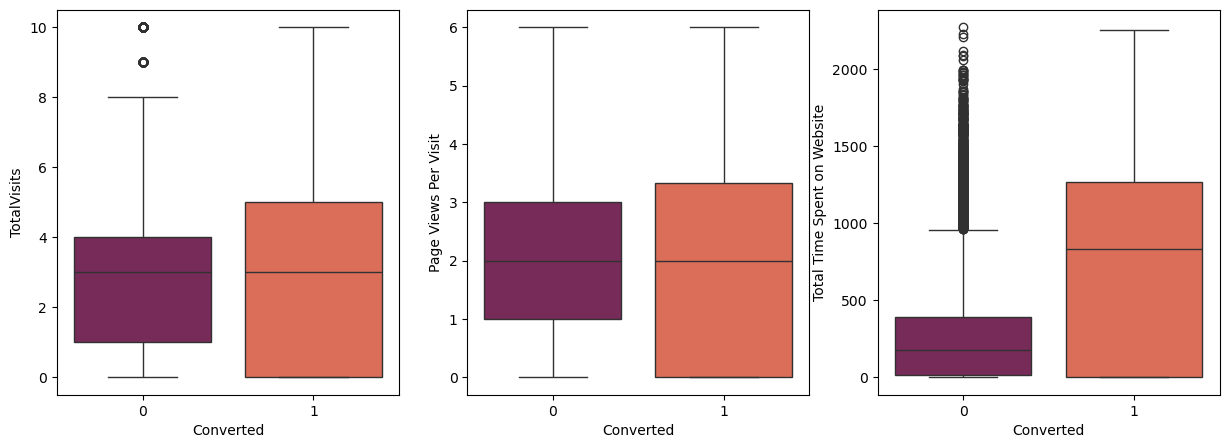

In [68]:
# For numerical columns
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df_leads  , palette='rocket')
plt.subplot(1,3,2)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df_leads, palette='rocket')
plt.subplot(1,3,3)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df_leads, palette='rocket')
plt.show()

>### Observation:
>>- People who spend more time on website they have higher chances of getting converted

### Bivariate Analysis for Numerical Variable

<Figure size 1600x400 with 0 Axes>

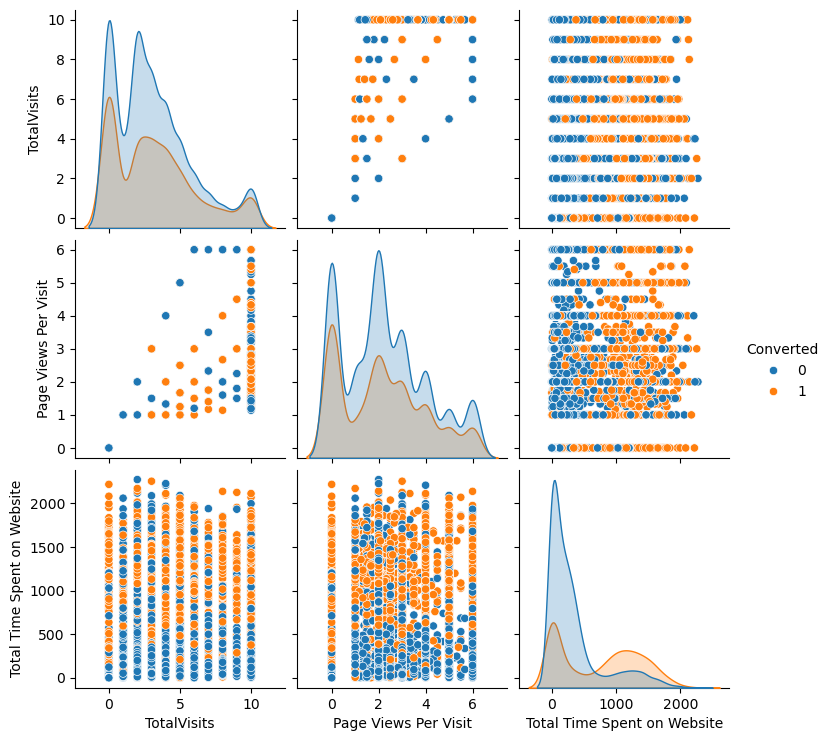

In [71]:
# plotting a pair plot
plt.figure(figsize=(16, 4))
sns.pairplot(data=df_leads,vars=num_cols,hue="Converted" )
plt.show()

In [72]:
num_cols = ['Converted'] + num_cols

<Axes: >

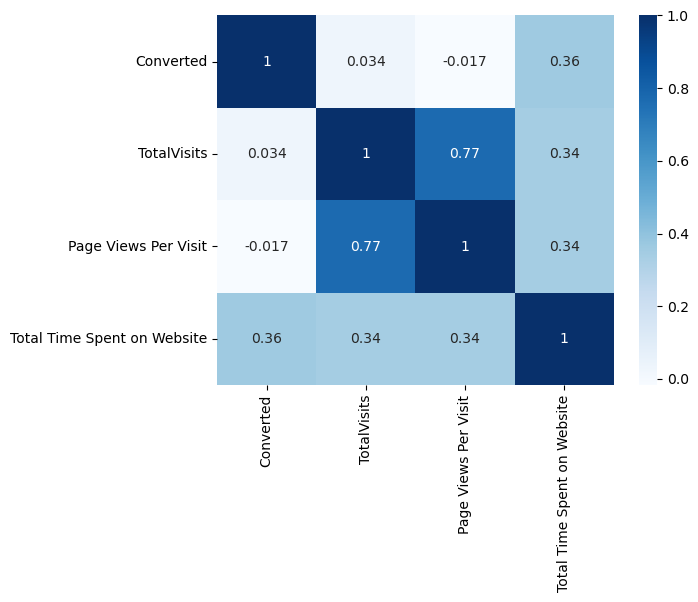

In [73]:
# Creating heatmap of correlation matrix
sns.heatmap(df_leads[num_cols].corr() , annot=True , cmap='Blues')

# Step-4. Data Preprocessing for Modeling

## Creating Dummies

>- 'What is your current occupation' feature is having one level as 'Missing' which is nothing but the missing values so instead of using (drop_first=Ture) we will drop that level while creating dummies

In [77]:
# 'What is your current occupation' feature is having one level a 'Missing' dropping that level while creating dummies
dummies_current_occupation = pd.get_dummies(df_leads['What is your current occupation'], prefix = 'What is your current occupation' , dtype='int64')
dummies_current_occupation = dummies_current_occupation.drop('What is your current occupation_Missing' , axis=1)
dummies_current_occupation.head()

,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,1,0,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0


In [78]:
# Creating Dummies for categorical variables
cat_cols = [col for col in cat_cols if col != 'What is your current occupation']
dummies = pd.get_dummies(df_leads[cat_cols] , drop_first=True , dtype='int64')
dummies.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [79]:
# Concatenating dummies with main dataset
final_df = pd.concat([df_leads, dummies_current_occupation ,dummies] , axis=1)

In [80]:
# Removing categorical columns
cat_cols = cat_cols + ['What is your current occupation']
final_df = final_df.drop(cat_cols , axis=1)
final_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [81]:
# Shape of final df
final_df.shape

(9240, 47)

## Train Test Split

In [83]:
# Creating Dataset with Independent variables and Dependent variable
y = final_df.pop('Converted')
X = final_df

In [84]:
# Checking the shape of X and y
X.shape , y.shape

((9240, 46), (9240,))

In [85]:
# Splitting the dataset into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=100)

In [86]:
# Checking the shape of train dataset
X_train.shape , y_train.shape

((6468, 46), (6468,))

In [87]:
# Checking the shape of test dataset
X_test.shape , y_test.shape

((2772, 46), (2772,))

In [88]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,0.0,0,0.00,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6795,4.0,487,1.33,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3516,5.0,106,2.50,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8105,5.0,1230,5.00,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3934,0.0,0,0.00,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [89]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4269,8.0,1011,6.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2376,0.0,0,0.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7766,5.0,59,5.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9199,0.0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4359,0.0,0,0.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


## Feature Scaling

In [91]:
# We will Normalize all the numerical features
num_cols = [ 'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']
# initializing scaler
scaler = MinMaxScaler()

# fitting and transforming the numerical values on X_train
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [92]:
# Checking train data after scaling
X_train[num_cols].describe()

,TotalVisits,Page Views Per Visit,Total Time Spent on Website
count,6468.000000,6468.000000,6468.000000
mean,0.312693,0.369153,0.212974
std,0.278726,0.299005,0.240566
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.005282
50%,0.300000,0.333333,0.108275
75%,0.500000,0.500000,0.407790
max,1.000000,1.000000,1.000000


In [93]:
# Transforming test Dataset using scaler
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [94]:
# Checking test data after scaling
X_test[num_cols].describe()

,TotalVisits,Page Views Per Visit,Total Time Spent on Website
count,2772.000000,2772.000000,2772.000000
mean,0.315296,0.375005,0.218582
std,0.278944,0.302335,0.242693
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.005722
50%,0.300000,0.333333,0.113556
75%,0.500000,0.583333,0.417694
max,1.000000,1.000000,0.991637


# Step-5. Model Building

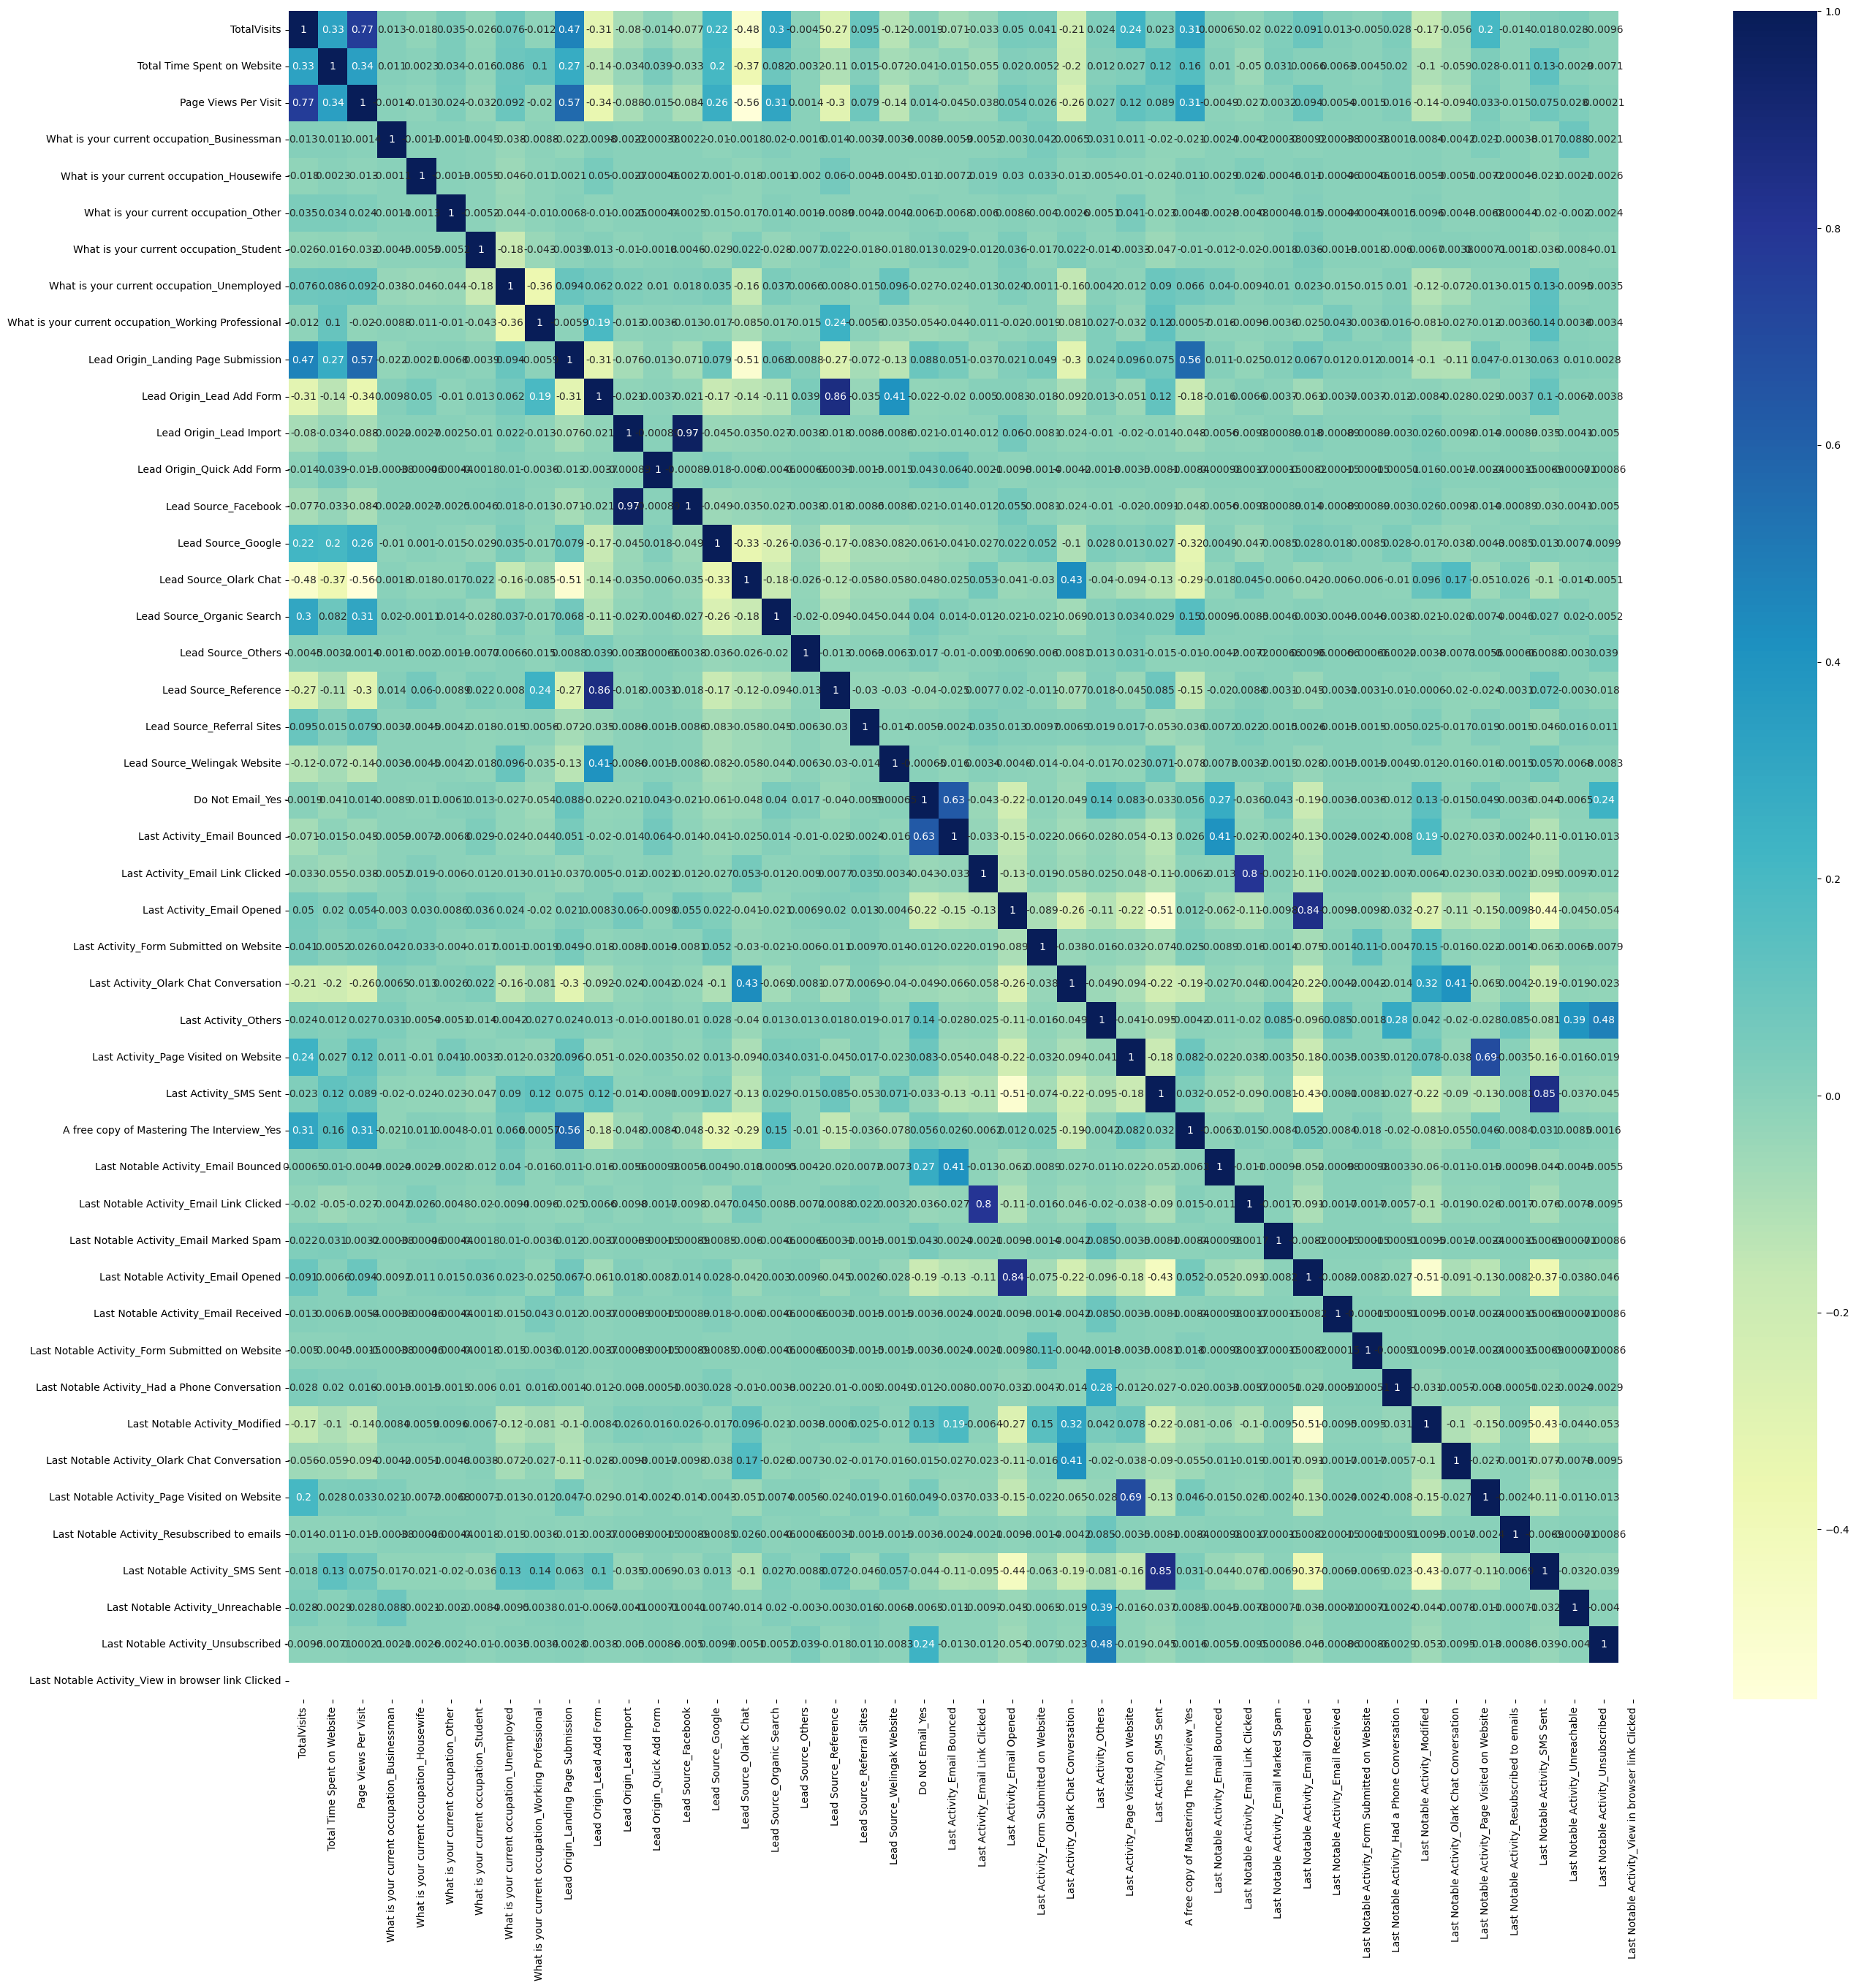

In [96]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (30, 30))
sns.heatmap(X_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Model 1

In [98]:
# Building a logistic regression model using all the features

# initializing model
logReg = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
model = logReg.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6423
Model Family:                Binomial   Df Model:                           44
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 21 Jan 2025   Deviance:                   1.4313e+05
Time:                        01:11:08   Pearson chi2:                 7.00e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                -1.741e+14   1.08e+07  -1.61e+07      0.000   -1.74e+14   -1.74e+14
TotalVisits                                           9.478e+14   5.11e+06   1.85e+08      0.000    9.48e+14    9.48e+14
Total Time Spent on Website                          -1.921e+13   3.95e+06  -4.87e+06      0.000   -1.92e+13   -1.92e+13
Page Views Per Visit                                 -4.397e+14   5.22e+06  -8.42e+07      0.000    -4.4e+14    -4.4e+14
What is your current occupation_Businessman           8.073e+14   2.76e+07   2.92e+07      0.000    8.07e+14    8.07e+14
What is your current occupation_Housewife              4.28e+15   2.25e+07    1.9e+08      0.000    4.28e+15    4.28e+15
What is your current occupation_Other                 1.073e+15   2.39e+07   4.49e+07      0.000    1.07e+15    1.07e+15
What is your current occupation_Student               5.612e+14   6.01e+06   9.34e+07      0.000    5.61e+14    5.61e+14
What is your current occupation_Unemployed            5.897e+14   2.01e+06   2.94e+08      0.000     5.9e+14     5.9e+14
What is your current occupation_Working Professional   1.76e+15   3.65e+06   4.82e+08      0.000    1.76e+15    1.76e+15
Lead Origin_Landing Page Submission                  -1.549e+14   2.68e+06  -5.77e+07      0.000   -1.55e+14   -1.55e+14
Lead Origin_Lead Add Form                             4.098e+14   1.23e+07   3.33e+07      0.000     4.1e+14     4.1e+14
Lead Origin_Lead Import                               2.885e+13    4.8e+07   6.01e+05      0.000    2.88e+13    2.88e+13
Lead Origin_Quick Add Form                            5.586e+15   6.74e+07   8.29e+07      0.000    5.59e+15    5.59e+15
Lead Source_Facebook                                  3.952e+14    4.8e+07   8.24e+06      0.000    3.95e+14    3.95e+14
Lead Source_Google                                    2.585e+14   2.81e+06   9.19e+07      0.000    2.59e+14    2.59e+14
Lead Source_Olark Chat                                2.036e+14   3.99e+06    5.1e+07      0.000    2.04e+14    2.04e+14
Lead Source_Organic Search                             7.78e+13   3.21e+06   2.42e+07      0.000    7.78e+13    7.78e+13
Lead Source_Others                                    1.159e+14   1.63e+07    7.1e+06      0.000    1.16e+14    1.16e+14
Lead Source_Reference                                 9.739e+13   1.28e+07   7.62e+06      0.000    9.74e+13    9.74e+13
Lead Source_Referral Sites                           -2.943e+13   7.57e+06  -3.89e+06      0.000   -2.94e+13   -2.94e+13
Lead Source_Welingak Website                           8.48e+14   1.42e+07   5.99e+07      0.000    8.48e+14    8.48e+14
Do Not Email_Yes                                     -5.05

>### Observation:
>>- There are several features are insignificant as they are having p-value greater than 0.05
>>- So we will use recursive feature elimination(RFE) method to drop some of the features

## RFE(Recursive Feature Elimination)
- Using RFE we will select top 15 columns for modelling

In [101]:
# initializing model
model = LogisticRegression()

# selecting top 15 features
rfe = RFE(estimator= model , n_features_to_select= 15)
rfe = rfe.fit(X_train, y_train)

In [102]:
# Checking all the features
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('What is your current occupation_Businessman', False, 13),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', False, 6),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('Lead Origin_Landing Page Submission', False, 18),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 30),
 ('Lead Origin_Quick Add Form', False, 16),
 ('Lead Source_Facebook', False, 23),
 ('Lead Source_Google', False, 14),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 26),
 ('Lead Source_Others', False, 8),
 ('Lead Source_Reference', False, 4),
 ('Lead Source_Referral Sites', False, 31),
 ('Lead Source_Welingak Website', True, 1),
 ('Do Not Email_Yes', True, 1),
 ('Last Activ

In [103]:
# selecting top 15 features
top_15_features = list(X_train.columns[rfe.support_])
print(top_15_features)

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'What is your current occupation_Housewife', 'What is your current occupation_Student', 'What is your current occupation_Unemployed', 'What is your current occupation_Working Professional', 'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat', 'Lead Source_Welingak Website', 'Do Not Email_Yes', 'Last Activity_SMS Sent', 'Last Notable Activity_Had a Phone Conversation', 'Last Notable Activity_Olark Chat Conversation', 'Last Notable Activity_Unreachable']


In [104]:
# Dropping the other features
X_train = X_train[top_15_features]

### Model 2

In [106]:
# Creating model using 15 features
logReg = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
model = logReg.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2662.5
Date:                Tue, 21 Jan 2025   Deviance:                       5325.0
Time:                        01:11:12   Pearson chi2:                 6.88e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3971
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.6022      0.131    -27.588      0.000      -3.858      -3.346
TotalVisits                                              1.4108      0.189      7.469      0.000       1.041       1.781
Total Time Spent on Website                              4.5521      0.166     27.504      0.000       4.228       4.877
Page Views Per Visit                                    -0.9334      0.198     -4.726      0.000      -1.321      -0.546
What is your current occupation_Housewife               24.1364   1.39e+04      0.002      0.999   -2.71e+04    2.72e+04
What is your current occupation_Student                  1.2785      0.235      5.447      0.000       0.818       1.739
What is your current occupation_Unemployed               1.1929      0.086     13.874      0.000       1.024       1.361
What is your current occupation_Working Professional     3.7599      0.198     19.035      0.000       3.373       4.147
Lead Origin_Lead Add Form                                3.5561      0.205     17.349      0.000       3.154       3.958
Lead Source_Olark Chat                                   1.2703      0.126     10.054      0.000       1.023       1.518
Lead Source_Welingak Website                             1.9555      0.744      2.630      0.009       0.498       3.413
Do Not Email_Yes                                        -1.3199      0.166     -7.962      0.000      -1.645      -0.995
Last Activity_SMS Sent                                   1.4459      0.074     19.486      0.000       1.301       1.591
Last Notable Activity_Had a Phone Conversation           3.6764      1.136      3.237      0.001       1.450       5.903
Last Notable Activity_Olark Chat Conversation           -0.8133      0.342     -2.376      0.018      -1.484      -0.142
Last Notable Activity_Unreachable                        2.1437      0.532      4.033      0.000       1.102       3.186
========================================================================================================================
"""

>### Observation:
>>- Some features are having very high p-value we should drop them one by one
>>- and Also check their VIF value

## VIF(Variance Inflation Factor)

In [109]:
vif = pd.DataFrame()
vif['features'] = [col for col in X_train.columns]
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round( vif.VIF ,2 )
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
2,Page Views Per Visit,6.42
0,TotalVisits,5.57
5,What is your current occupation_Unemployed,2.68
1,Total Time Spent on Website,2.11
7,Lead Origin_Lead Add Form,1.61
11,Last Activity_SMS Sent,1.53
6,What is your current occupation_Working Profes...,1.37
8,Lead Source_Olark Chat,1.24
9,Lead Source_Welingak Website,1.24
10,Do Not Email_Yes,1.07


#### 'What is your current occupation_Housewife' is highly insignificant(p-value = 0.999) so we will drop it

In [111]:
# Dropping 'What is your current occupation_Housewife' column
X_train = X_train.drop('What is your current occupation_Housewife' , axis=1)

### Model 3

In [113]:
# creating a model
# Initalizing model
logReg = sm.GLM(y_train, sm.add_constant(X_train) , family = sm.families.Binomial())
model = logReg.fit()

# printing model summary
print(model.summary())
print('\n\n')
print('------VIF Score-----\n')

# for VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2675.6
Date:                Tue, 21 Jan 2025   Deviance:                       5351.2
Time:                        01:11:13   Pearson chi2:                 6.95e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3947
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

#### 'Page Views Per Visit' is having high VIF value so its advisable to drop it

In [115]:
# Dropping the 'Page Views Per Visit'
X_train.drop('Page Views Per Visit' , axis=1 , inplace=True)

### Model 4

In [117]:
# creating a model
# Initalizing model
logReg = sm.GLM(y_train, sm.add_constant(X_train) , family = sm.families.Binomial())
model = logReg.fit()

# printing model summary
print(model.summary())
print('\n\n')
print('------VIF Score-----\n')

# for VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2686.7
Date:                Tue, 21 Jan 2025   Deviance:                       5373.4
Time:                        01:11:14   Pearson chi2:                 6.94e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3926
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

#### p-Value and VIF score for all the features are within the acceptance criteria

# Step-6. Model Evaluation

In [120]:
# Predicting values on train dataset
y_train_pred = model.predict(sm.add_constant(X_train))
y_train_pred_final = pd.DataFrame({'Converted':y_train.values , 'ConversionProb':y_train_pred.values} )
y_train_pred_final['predicted'] = y_train_pred_final['ConversionProb'].apply(lambda x : 0 if x <= 0.5 else 1)
y_train_pred_final.head()

,Converted,ConversionProb,predicted
0,0,0.241547,0
1,0,0.213734,0
2,0,0.378341,0
3,0,0.839272,1
4,0,0.241547,0


In [121]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3542  460]
 [ 750 1716]]


In [122]:
# Predicted        not_converted  |  converted
# Actual                          |
# -----------------------------------------------------
# not_converted       3542       |   460
# converted           750        |   1716


# Above is the confusion matrix when we use threshold of probability as 0.5

In [123]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8129251700680272


In [124]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [125]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.6958637469586375


In [126]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8850574712643678


In [127]:
# Calculate false postive rate - predicting conversion when customer does not have converted
print(FP/ float(TN+FP))

0.11494252873563218


In [128]:
# positive predictive value
print (TP / float(TP+FP))

0.7886029411764706


In [129]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8252562907735321


##  Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [131]:
# Defining function to draw ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [132]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final["Converted"], y_train_pred_final["ConversionProb"], drop_intermediate = False )

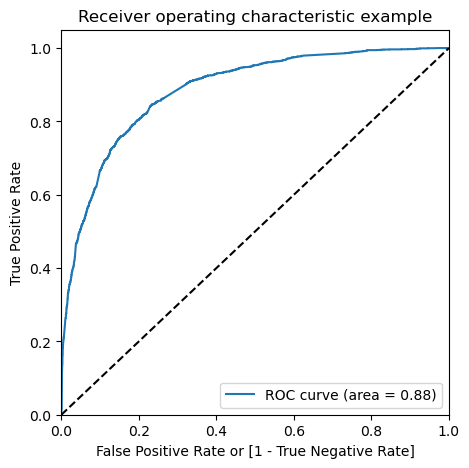

In [133]:
# Drawing ROC curve for Train Set
draw_roc(y_train_pred_final["Converted"], y_train_pred_final["ConversionProb"])

## Finding Optimal Cutoff Point/ Probability

In [135]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['ConversionProb'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,ConversionProb,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.241547,0,1,1,1,0,0,0,0,0,0,0
1,0,0.213734,0,1,1,1,0,0,0,0,0,0,0
2,0,0.378341,0,1,1,1,1,0,0,0,0,0,0
3,0,0.839272,1,1,1,1,1,1,1,1,1,1,0
4,0,0.241547,0,1,1,1,0,0,0,0,0,0,0


In [136]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.620439  0.974453  0.402299
0.2   0.2  0.747835  0.916869  0.643678
0.3   0.3  0.797155  0.820357  0.782859
0.4   0.4  0.809833  0.761557  0.839580
0.5   0.5  0.812925  0.695864  0.885057
0.6   0.6  0.796073  0.591241  0.922289
0.7   0.7  0.783395  0.521087  0.945027
0.8   0.8  0.752474  0.399432  0.970015
0.9   0.9  0.719852  0.286294  0.987006


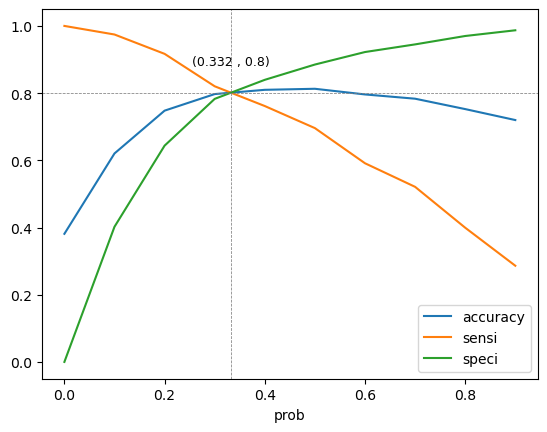

In [137]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

from scipy.interpolate import interp1d
from scipy.optimize import fsolve

# Finding the intersection points of the sensitivity and accuracy curves
sensi_interp = interp1d(cutoff_df['prob'], cutoff_df['sensi'], kind='linear')
acc_interp = interp1d(cutoff_df['prob'], cutoff_df['accuracy'], kind='linear')
intersection_1 = np.round(float(fsolve(lambda x : sensi_interp(x) - acc_interp(x), 0.5)), 3)

# Find the intersection points of the specificity and accuracy curves
speci_interp = interp1d(cutoff_df['prob'], cutoff_df['speci'], kind='linear')
intersection_2 = np.round(float(fsolve(lambda x : speci_interp(x) - acc_interp(x), 0.5)), 3)

# Calculate the average of the two intersection points
intersection_x = (intersection_1 + intersection_2) / 2

# Interpolate the accuracy, sensitivity, and specificity at the intersection point
accuracy_at_intersection = np.round(float(acc_interp(intersection_x)), 2)
sensitivity_at_intersection = np.round(float(sensi_interp(intersection_x)), 2)
specificity_at_intersection = np.round(float(speci_interp(intersection_x)), 2)

# Plot the three curves and add vertical and horizontal lines at intersection point
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.axvline(x=intersection_x, color='grey',linewidth=0.55, linestyle='--')
plt.axhline(y=accuracy_at_intersection, color='grey',linewidth=0.55, linestyle='--')

# Adding annotation to display the (x,y) intersection point coordinates
plt.annotate(f'({intersection_x} , {accuracy_at_intersection})',
             xy=(intersection_x, accuracy_at_intersection),
             xytext=(0,20),
             textcoords='offset points',
             ha='center',
             fontsize=9)

# Displaying the plot
plt.show()

>### Observation:
>>- 0.332 is the approximate point where all the curves meet, so **0.332** seems to be our Optimal cutoff point for probability threshold
>>-
Lets do mapping again using optimal cutoff point

In [139]:
y_train_pred_final['final_predicted'] = y_train_pred_final['ConversionProb'].map( lambda x: 1 if x > 0.332 else 0)

# deleting the unwanted columns from dataframe
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"predicted"],axis = 1, inplace = True)
y_train_pred_final.head()

,Converted,ConversionProb,final_predicted
0,0,0.241547,0
1,0,0.213734,0
2,0,0.378341,1
3,0,0.839272,1
4,0,0.241547,0


In [140]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"]))

# or can be found using confusion matrix with formula, lets find all matrix in one go ahead using UDF

0.8027210884353742


In [141]:
def logreg_all_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]

    accuracy = (TN+TP)/(TN+TP+FN+FP)
    sensi = TP/(TP+FN)
    speci = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)

    #Calculate false postive rate - predicting conversion when customer does not have converted
    FPR = FP/(FP + TN)
    FNR = FN/(FN +TP)

    print ("True Negative                    : ", TN)
    print ("True Positive                    : ", TP)
    print ("False Negative                   : ", FN)
    print ("False Positve                    : ", FP)

    print ("Model Accuracy                   : ", round(accuracy,4))
    print ("Model Sensitivity                : ", round(sensi,4))
    print ("Model Specificity                : ", round(speci,4))
    print ("Model Precision                  : ", round(precision,4))
    print ("Model Recall                     : ", round(recall,4))
    print ("Model True Positive Rate (TPR)   : ", round(TPR,4))
    print ("Model False Positive Rate (FPR)  : ", round(FPR,4))


In [142]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
print("="*50,"\n")

#Printing Confution matrix
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("="*50,"\n")

# calculating all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("="*50,"\n")


Confusion Matrix
[[3211  791]
 [ 485 1981]] 


True Negative                    :  3211
True Positive                    :  1981
False Negative                   :  485
False Positve                    :  791
Model Accuracy                   :  0.8027
Model Sensitivity                :  0.8033
Model Specificity                :  0.8023
Model Precision                  :  0.7146
Model Recall                     :  0.8033
Model True Positive Rate (TPR)   :  0.8033
Model False Positive Rate (FPR)  :  0.1977





## Precision Recall Trade Off
- Finding a optimal cutoff probability using Precision Recall

In [144]:
# Creating precision-recall tradeoff curve
y_train_pred_final['Converted'], y_train_pred_final['final_predicted']
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['ConversionProb'])

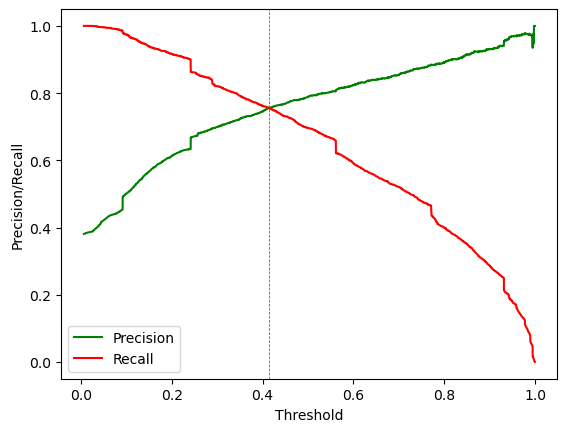

In [145]:
# plot precision-recall tradeoff curve
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")

# add legend and axis labels

plt.axvline(x=0.413, color='teal',linewidth = 0.55, linestyle='--')
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

plt.show()

>### Observation:
>>- The intersection point of the curve represents the threshold value where the model achieves a balance between precision and recall.
>>- This threshold can be used to optimize the model's performance according to business requirements. In our case, the probability threshold is approximately **0.413** based on the curve.


In [147]:
# copying df to evaluate the model using precision recall threshold of 0.413
y_train_precision_recall = y_train_pred_final.copy()

In [148]:
y_train_precision_recall['precision_recall_prediction'] = y_train_precision_recall['ConversionProb'].map( lambda x: 1 if x > 0.413 else 0)
y_train_precision_recall.head()

,Converted,ConversionProb,final_predicted,precision_recall_prediction
0,0,0.241547,0,0
1,0,0.213734,0,0
2,0,0.378341,1,0
3,0,0.839272,1,1
4,0,0.241547,0,0


In [149]:
# Finding Confusion metrics for 'y_train_precision_recall' df
confusion_matrix = metrics.confusion_matrix(y_train_precision_recall['Converted'], y_train_precision_recall['precision_recall_prediction'])
print("="*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("="*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("="*50,"\n")



Confusion Matrix
[[3400  602]
 [ 602 1864]] 


True Negative                    :  3400
True Positive                    :  1864
False Negative                   :  602
False Positve                    :  602
Model Accuracy                   :  0.8139
Model Sensitivity                :  0.7559
Model Specificity                :  0.8496
Model Precision                  :  0.7559
Model Recall                     :  0.7559
Model True Positive Rate (TPR)   :  0.7559
Model False Positive Rate (FPR)  :  0.1504





>### Observation:
>>- Using a precision-recall cutoff of **0.413**, the True Positive Rate (Sensitivity/Recall) has dropped to about 75%, while the business objective requires this metric to be closer to 80%.
>>- We have successfully attained the desired metrics of **80%** for both Sensitivity and Specificity by implementing a cutoff threshold of **0.332**. Consequently, we shall continue with the sensitivity-specificity analysis to determine the optimal cutoff for making final predictions.

### Adding **Lead Score** feature to Train Dataframe
- A higher score would mean that the lead is hot, i.e. is most likely to convert 
- Whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [152]:
# Adding lead score
y_train_pred_final['Lead_Score'] = y_train_pred_final['ConversionProb'].map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,ConversionProb,final_predicted,Lead_Score
0,0,0.241547,0,24
1,0,0.213734,0,21
2,0,0.378341,1,38
3,0,0.839272,1,84
4,0,0.241547,0,24


### Making Prediction on Test dataset

In [154]:
# Predicting values on test dataset
X_test = X_test[X_train.columns]

In [155]:
# Predicting values on test dataset
y_test_pred = model.predict(sm.add_constant(X_test))
y_test_pred_final = pd.DataFrame({'Converted':y_test.values , 'ConversionProb':y_test_pred.values })
y_test_pred_final['predicted'] = y_test_pred_final['ConversionProb'].apply(lambda x : 0 if x < 0.344 else 1)
y_test_pred_final.head()

,Converted,ConversionProb,predicted
0,1,0.582148,1
1,1,0.931044,1
2,1,0.929867,1
3,0,0.241547,0
4,1,0.770844,1


In [156]:
# Adding lead score
y_test_pred_final['Lead_Score'] = y_test_pred_final['ConversionProb'].map( lambda x: round(x*100))
y_test_pred_final.head()

,Converted,ConversionProb,predicted,Lead_Score
0,1,0.582148,1,58
1,1,0.931044,1,93
2,1,0.929867,1,93
3,0,0.241547,0,24
4,1,0.770844,1,77


<strong>Lead Score: </strong> Lead Score is assigned to the customers
- The customers with a higher lead score have a higher conversion chance 
- The customers with a lower lead score have a lower conversion chance.

In [158]:
# Finding Confusion metrics for 'y_test_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_test_pred_final['Converted'], y_test_pred_final['predicted'])
print("="*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("="*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("="*50,"\n")


Confusion Matrix
[[1369  308]
 [ 212  883]] 


True Negative                    :  1369
True Positive                    :  883
False Negative                   :  212
False Positve                    :  308
Model Accuracy                   :  0.8124
Model Sensitivity                :  0.8064
Model Specificity                :  0.8163
Model Precision                  :  0.7414
Model Recall                     :  0.8064
Model True Positive Rate (TPR)   :  0.8064
Model False Positive Rate (FPR)  :  0.1837





>### Observation:
>>- The evaluation matrics are pretty close to each other so it indicates that the model is performing consistently across different evaluation metrics in both test and train dataset
>>- These matrics are very close to train set, so our final model is performing with good consistency on both Train & Test set


# <strong>Conclusion:</strong>
- Train dataset:
    - Accuracy    : 80.27%
    - Sensitivity : 80.33%
    - Specificity : 80.23%
  <br><br>    
- Test dataset:
    - Accuracy    : 81.24%
    - Sensitivity : 80.64%
    - Specificity : 81.63%

- The model achieved a sensitivity of 80.33% in the train set and 80.64% in the test set, using a cut-off value of `0.332`.
- Sensitivity in this case indicates how many leads the model identify correctly out of all potential leads which are converting
- `The CEO of X Education had set a target sensitivity of around 80%.`
- The model also achieved an accuracy of 80.29% on training dataset, which is in line with the study's objectives.

In [162]:
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2686.7
Date:                Tue, 21 Jan 2025   Deviance:                       5373.4
Time:                        01:11:20   Pearson chi2:                 6.94e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3926
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

## Model Parameters
- Final Logistic Regression model has 13 features
<br><br>
### Top 3 features that contributing positively to predicting hot leads
1. Total Time Spent on Website
2. Lead Origin_Lead Add Form
3. What is your current occupation_Working Professional

## Recommandation:

**To Increase conversion rate**
- Focus on features with positive coefficients for targeted marketing strategies.
- Develop strategies to attract high-quality leads from top-performing lead sources.
- Focus on creating more interactive and engaging content to increase the time spent by leads on the website, as it strongly correlates with conversions.
- Engage working professionals with tailored messaging.
- Provide proactive and personalized interactions via Olark Chat and Welingak Website to increase its effectiveness in driving conversions.
- Working professionals to be aggressively targeted as they have high conversion rate and will have better financial situation to pay higher fees too. 